loading Unstrctured Data from file: SCANPROC-*.csv
loading Strctured Data from file: STRUCTURED-*.csv
processing securiti_appliance_cpu_used-max*.csv
processing securiti_appliance_cpu_used-avg*.csv
processing securiti_appliance_task_queue_length-max*.csv
processing securiti_appliance_task_queue_length-avg*.csv
processing securiti_appliance_memory_used-max*.csv
processing securiti_appliance_memory_used-avg*.csv
loading Unstrctured Data from file: UNSTRUCTURED-*.csv


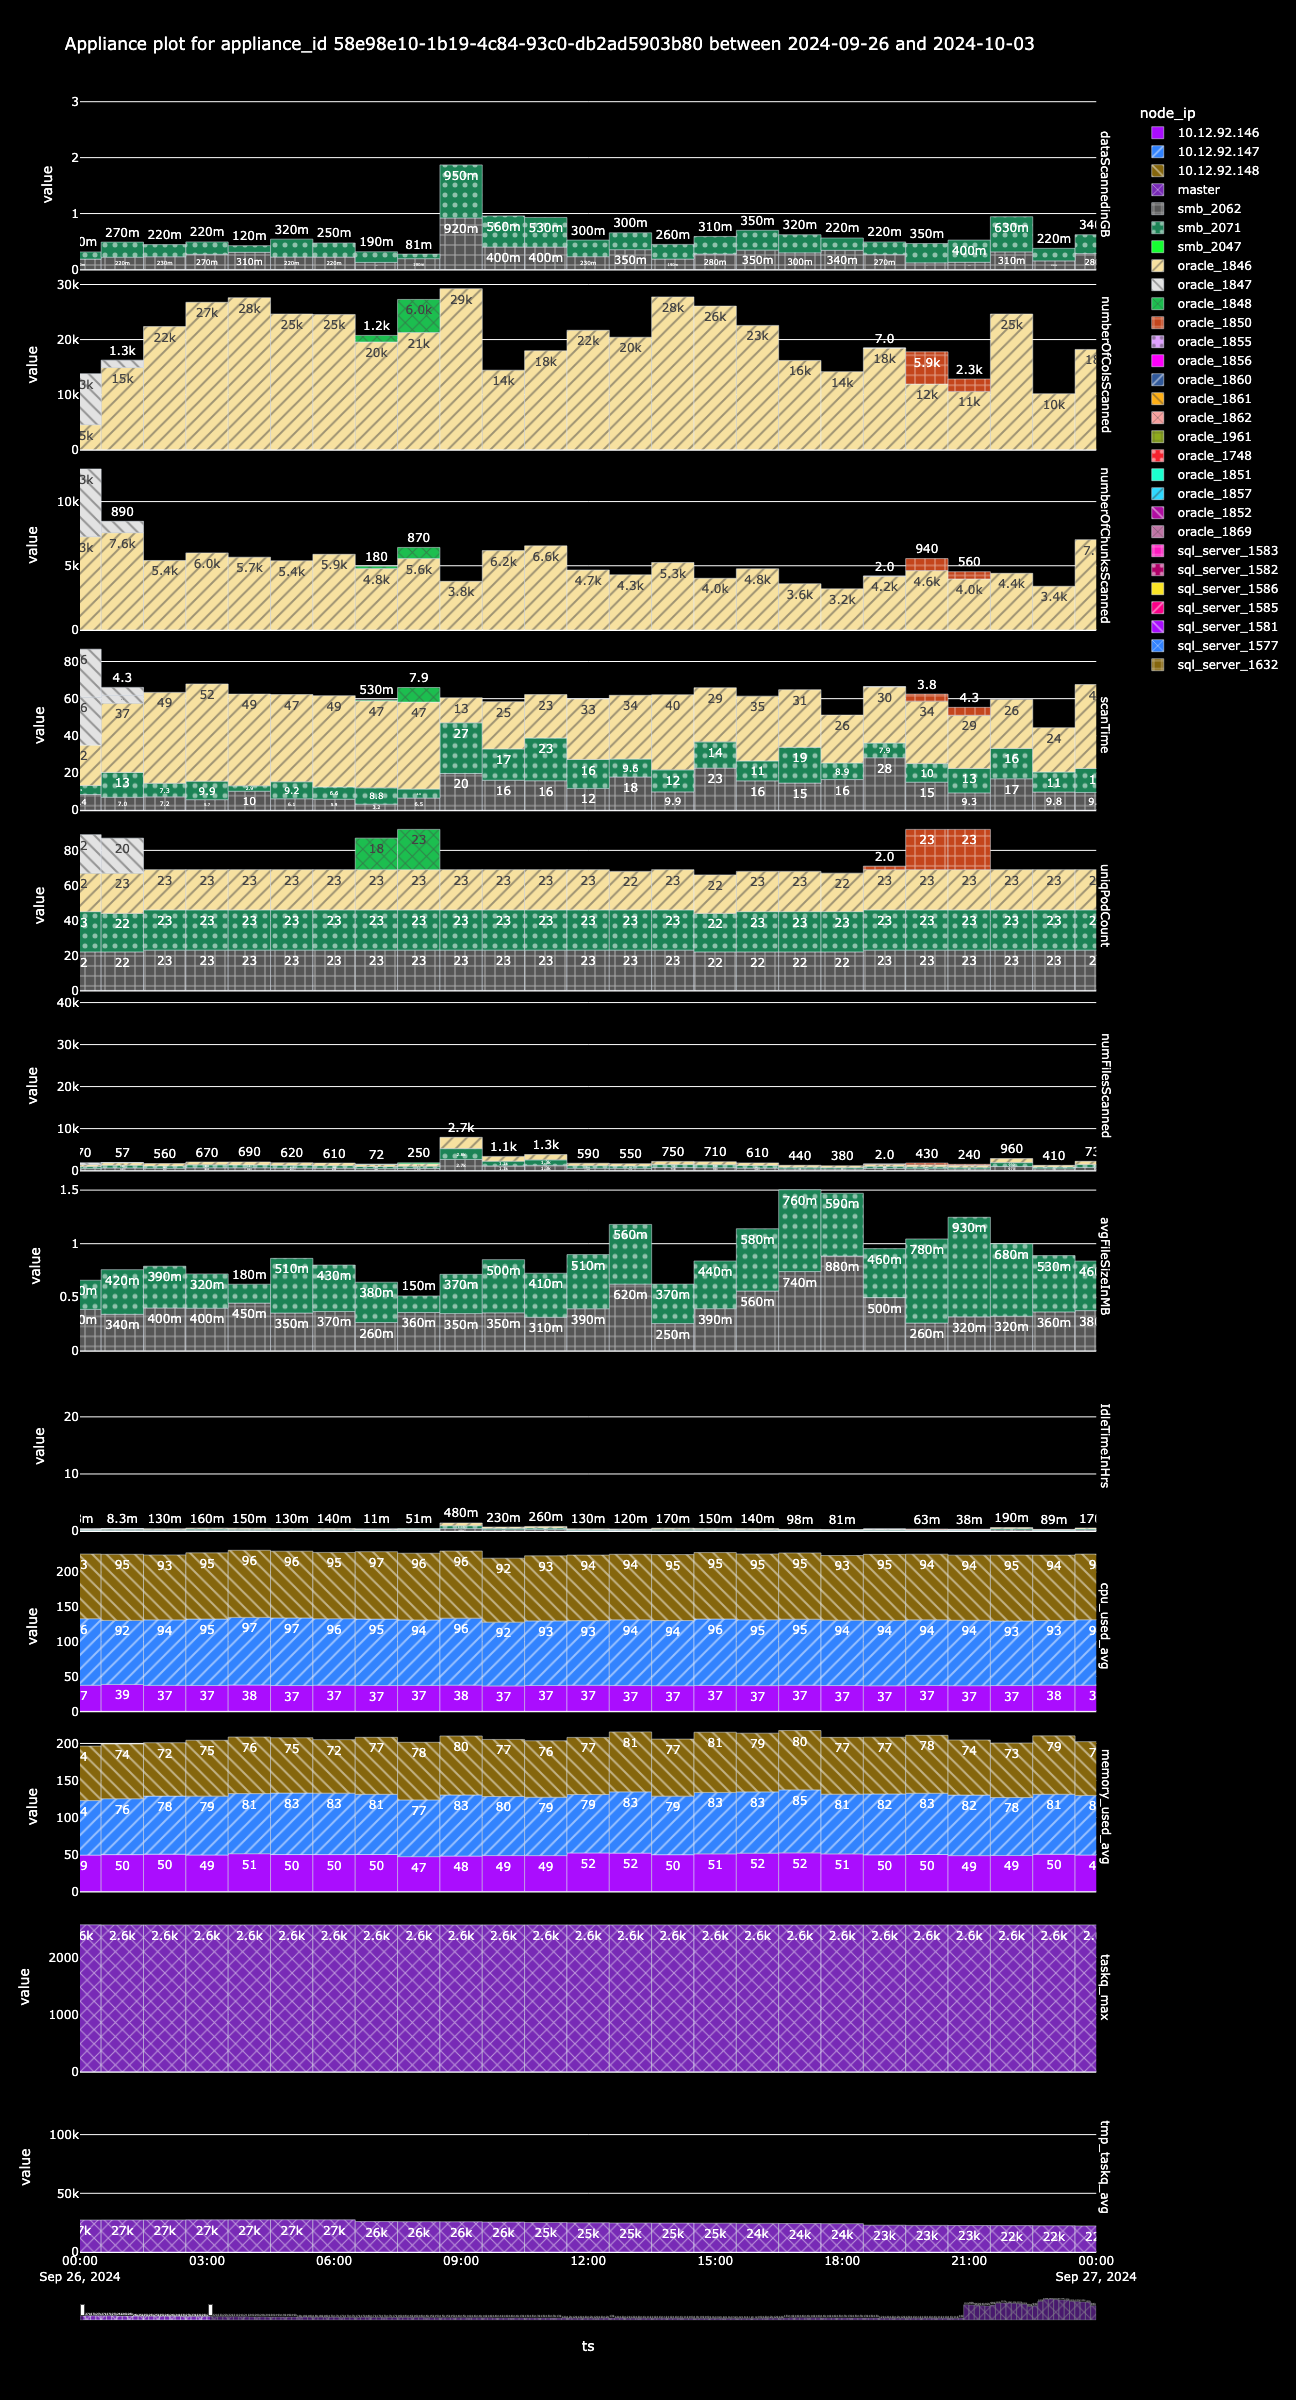

In [12]:
import dataframeLoader as dfl
import pandas as pd

from importlib import reload 
reload(dfl)

# Provide csv data location and appliance and timerange information.
root = '../../.dataDir'
appliance_id='58e98e10-1b19-4c84-93c0-db2ad5903b80'
fromDt = '2024-09-26'
toDt = '2024-10-03'

# Provide list of prometheus metrics to load. 
# metricsArr = ['cpu_used', 'download_workers_count', 'memory_used', 'task_queue_length', 'infra_access_latency', 'pod_cpu_usage', 'pod_memory_usage'] 
metricsArr = ['cpu_used'
              ,'task_queue_length'
              , 'memory_used'
              ]


daterange=[fromDt, toDt]
df = dfl.loadApplianceTimeSeriesData(root, metricsArr, daterange)

dfp = df[(df['appliance_id'] == appliance_id)]
# Get Full list of metrics in dataframe
# metrics_category_order = list(dfp.metrics.unique())
# Provide metrics to show from the data frame. Order is preserved.
metrics_category_order = [
            "dataScannedinGB"
            ,"numberOfColsScanned", "numberOfChunksScanned"
            ,"scanTime", "fileDownloadTimeInHrs","uniqPodCount"
            ,"numFilesScanned", "avgFileSizeInMB", "IdleTimeInHrs"
            ,"cpu_used_avg", "memory_used_avg"
            ,"taskq_max","tmp_taskq_avg"
             ]

title = 'Appliance plot for appliance_id '+appliance_id+' between '+fromDt+' and '+toDt
fig  = dfl.plotMetricsFacetForApplianceId(dfp, title, metrics_category_order)

fig.update_layout(plot_bgcolor="black", font_color='white', paper_bgcolor='black')
fig.show()
